***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [398]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


### Importe o dataset e armazene o conteúdo em uma DataFrame

In [399]:
df = pd.read_csv('dados.csv')


### Visualize o conteúdo do DataFrame

In [400]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)


A - ► > reais 19700

B - 25 * SM ► de 11820 a 19700 reais

C - 15 * SM ► de 3940 a 11820 reais

D - 5 * SM ► de 1576 a  3940 reais

E - 2 * SM ► reais 1576


### 2º Definir os labels das classes

In [401]:
classes = [0,1576,3940,11820,19700,200000]
labels = ['E','D','C','B','A']

### 3º Construir a coluna de frequências

In [402]:
frequencia_renda = pd.value_counts(
    pd.cut(
        df.Renda,
        bins = classes,
        ordered = True,
        labels = labels,
        include_lowest = True
            )
               )

### 4º Construir a coluna de percentuais

In [403]:
porcentual_renda = pd.value_counts(
    pd.cut(
        df.Renda,
        bins = classes,
        ordered = True,
        labels = labels
            ),
    normalize = True
               )*100

porcentual_renda

E    63.385289
D    25.147013
C     9.788707
B     1.111216
A     0.567775
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [404]:
renda = pd.DataFrame(frequencia_renda).rename(columns={'Renda':'Frequencia'})
renda['Porcentual'] = porcentual_renda
renda

,Frequencia,Porcentual
E,49755,63.385289
D,18602,25.147013
C,7241,9.788707
B,822,1.111216
A,420,0.567775


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

In [405]:
list(renda.index)

['E', 'D', 'C', 'B', 'A']

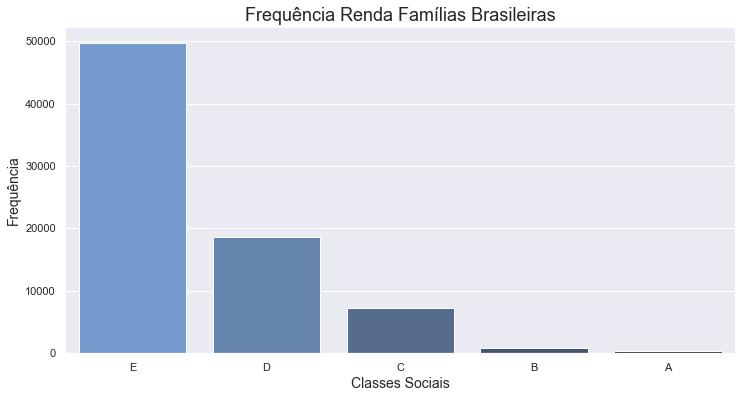

In [406]:
labels = list(renda.index)
color = sns.dark_palette("#69d", reverse=True)
ax = sns.barplot(x = labels,
                y = renda.Frequencia,
                data = renda,
                palette = color)
ax.figure.set_size_inches(12,6)

ax.set_xlabel('Classes Sociais',size=14)
ax.set_ylabel('Frequência',size=14)
ax.set_title('Frequência Renda Famílias Brasileiras',size=18)
ax.figure.show()


> ### Conclusões

Com base no gráfico, retrata a distribuição das classes sociais no Brasil  em  2015.
A Classe C, que tem renda entre  0 a 1576,00 reais, representa 64% da população brasileira. Mostrando o tamanho da desigualdade social existente naquela época.



### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [407]:
df.Sexo

0        0
1        1
2        1
3        0
4        1
        ..
76835    1
76836    0
76837    0
76838    0
76839    0
Name: Sexo, Length: 76840, dtype: int64

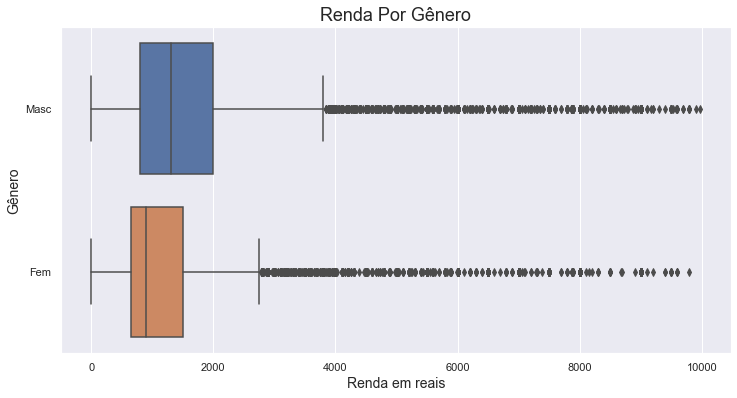

In [408]:


ax = sns.boxplot(x = df.query("Renda<10000").Renda,
            y = df.Sexo,
            data =df.query("Renda<10000"),
            orient = 'h')
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Renda em reais',size=14)
ax.set_ylabel('Gênero',size=14)
ax.set_yticks(ticks = df.Sexo.unique(),
              labels = ['Masc','Fem'])
ax.set_title('Renda Por Gênero',size=18)
ax.figure.show()



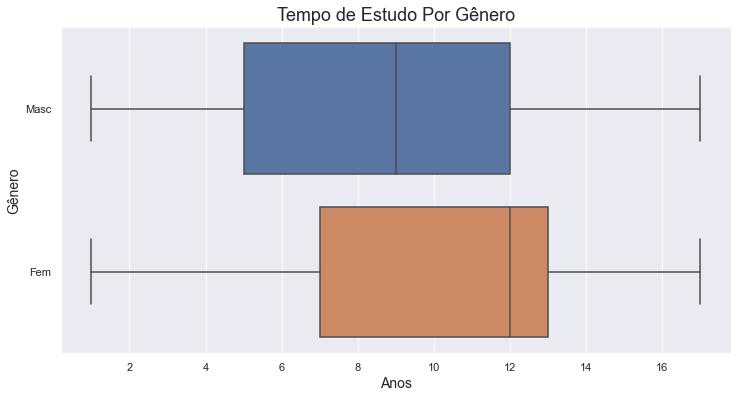

In [409]:


ax = sns.boxplot(x = df['Anos de Estudo'],
            y = df.Sexo,
            data =df,
            orient = 'h')
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Anos',size=14)
ax.set_ylabel('Gênero',size=14)
ax.set_yticks(ticks = df.Sexo.unique(),
              labels = ['Masc','Fem'])
ax.set_title('Tempo de Estudo Por Gênero',size=18)
ax.figure.show()

> ### Conclusões

A desigualdade social, além das classes, é existente também entre os gêneros. As mulheres recebem menos que os homens. A metade do público feminino têm a renda que 25% dos homens recebem, praticamente.

Quando analisamos o tempo de estudo entre os gêneros. As mulheres em geral têm se dedicado mais aos estudos que os homens, metade das mulheres dedicaram 12 anos aos estudos. Já os homens, 9 anos.


### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

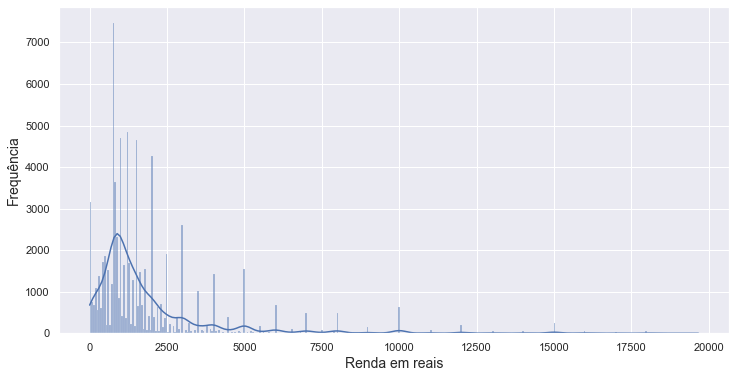

In [410]:
ax = sns.histplot(df.query('Renda<20000').Renda, kde = True)


ax.figure.set_size_inches(12,6)
plt.xlabel('Renda em reais',size=14)
plt.ylabel('Frequência',size=14)
ax.figure.show()

In [411]:

dados = df.copy()

dados['Estudo'] = df['Anos de Estudo'].apply(lambda x: faixa_estudo.get(x))
dados['Sexo']= dados.Sexo.apply(lambda x: sexo.get(x))
dados['Cor']= dados.Cor.apply(lambda x: cor.get(x))
dados['UF'] = dados.UF.apply(lambda x: uf.get(x))

dados.head(3)
                                     

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Estudo
0,Rondônia,Masculino,23,Parda,12,800,1.603808,10 a 12 anos
1,Rondônia,Feminino,23,Branca,12,1150,1.739790,10 a 12 anos
2,Rondônia,Feminino,35,Parda,15,880,1.760444,13 a 15 anos


### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [412]:
freq_genero = pd.crosstab(index = dados.Sexo,
                          columns = dados.Cor,
                          values = dados.Renda ,
                          aggfunc = 'count',
                          normalize=False)

porc_genero = pd.crosstab(index = dados.Sexo, 
                          columns = dados.Cor, 
                          values = dados.Renda ,
                          aggfunc = 'count',
                          normalize=True)

renda_genero = pd.crosstab(index = dados.Sexo,
                           columns = dados.Cor, 
                           values = dados.Renda , aggfunc = 'mean',
                           normalize=False).round(2)


In [413]:
freq_genero

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,117,9621,101,10862,2889
Masculino,235,22194,256,25063,5502


In [414]:
porc_genero

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,0.001523,0.125208,0.001314,0.141359,0.037598
Masculino,0.003058,0.288834,0.003332,0.326171,0.071603


In [415]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}

classes = [0,1,4,7,10,13,16,17]
labels = ['Sem instrução','1 a 3 anos','4 a 6 anos','7 a 9 anos','10 a 12 anos','13 a 15 anos','Sem instrução']

faixa_estudo = {
    1: 'Sem instrução', 
    
    2: '1 a 3 anos', #1
    3: '1 a 3 anos', #1
    4: '1 a 3 anos', #1
    
    5: '4 a 6 anos', #2
    6: '4 a 6 anos', #2
    7: '4 a 6 anos', #2
    
    8: '7 a 9 anos', #3
    9: '7 a 9 anos', #3
    10: '7 a 9 anos', #3
    
    11: '10 a 12 anos', #4
    12: '10 a 12 anos', #4
    13: '10 a 12 anos', #4
    
    14: '13 a 15 anos', #5
    15: '13 a 15 anos', #5
    16: '13 a 15 anos', #5
    
    17: 'Sem instrução'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

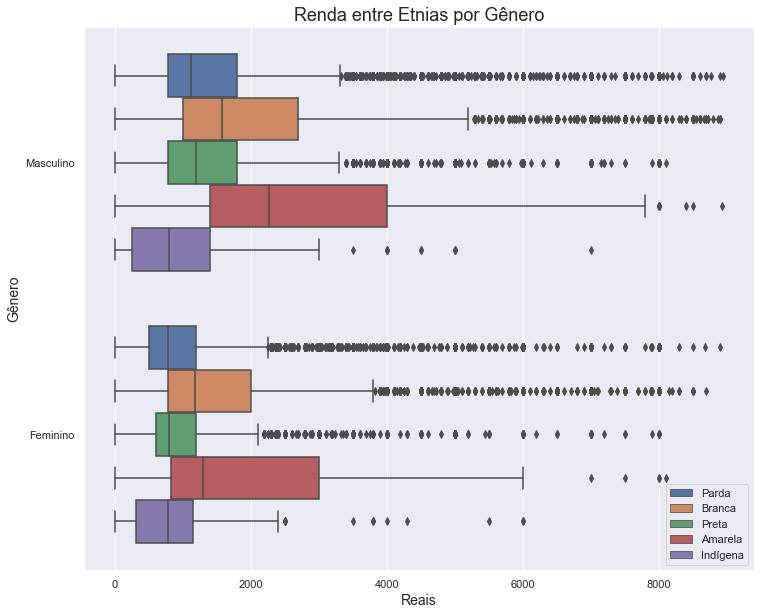

In [416]:
ax = sns.boxplot(
                x = dados.query("Renda<9000").Renda,
                y = dados.Sexo,
                hue = dados.Cor,
                data = dados.query("Renda<10000"),
                )

ax.figure.set_size_inches(12,10)
ax.set_ylabel('Gênero',size = 14)
ax.set_xlabel('Reais',size = 14)
plt.legend()
ax.set_title('Renda entre Etnias por Gênero',size = 18)
ax.figure.show()

> ### Conclusões

A desigualdade da renda por genero é evidente, mas entre as etnias do mesmo genero existem desigualdades.

As etnias que possuem maior renda estão as: Amarela e Branca.

A etnia que tem menor renda entre os generos, é a indígena

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [417]:
renda_media = dados.Renda.mean()
renda_media

2000.3831988547631

### Obtenha a mediana

In [418]:
renda_mediana = dados.Renda.median()
renda_mediana

1200.0

### Obtenha a moda

In [419]:
renda_moda = dados.Renda.mode()[0]
renda_moda

788

### Obtenha o desvio médio absoluto

In [420]:
renda_dma = dados.Renda.mad() 
round(renda_dma,2)

1526.5


### Obtenha a variância

In [421]:
renda_variancia = dados.Renda.var()
round(renda_variancia,2)

11044906.01

### Obtenha o desvio-padrão

In [422]:
renda_std = dados.Renda.std()
round(renda_std,2)

3323.39

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>


In [423]:
renda_genero_etnia = pd.crosstab(index = dados.Cor,
                                columns = dados.Sexo,
                                values = dados.Renda,
                                aggfunc = {'mean','median','max'})

renda_genero_etnia.columns = ['_'.join(col) for col in renda_genero_etnia.columns.values]
renda_genero_etnia


,max_Feminino,max_Masculino,mean_Feminino,mean_Masculino,median_Feminino,median_Masculino
Cor,,,,,,
Amarela,20000,50000,3027.341880,4758.251064,1500.0,2800.0
Branca,100000,200000,2109.866750,2925.744435,1200.0,1700.0
Indígena,120000,10000,2464.386139,1081.710938,788.0,797.5
Parda,30000,100000,1176.758516,1659.577425,800.0,1200.0
Preta,23000,50000,1134.596400,1603.861687,800.0,1200.0


> ### Conclusões

A Etnia amarela é que tem maiores valores da renda entre as medidas média e mediana

As Etnias preta e parda possuem as rendas semelhantes, indepedente do genero

A Etnia indigena masculina tem sido a que tem a menor renda.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>


In [424]:
genero_etnia_dispersao = pd.crosstab(index = dados.Cor, columns = dados.Sexo , values = dados.Renda , aggfunc={'mad', 'var', 'std'})

genero_etnia_dispersao.round(2)

mad                 std                     var             
Sexo     Feminino Masculino  Feminino Masculino      Feminino    Masculino
Cor                                                                       
Amarela   2549.15   3709.60   3731.17   5740.82  1.392166e+07  32957069.62
Branca    1670.97   2261.01   3251.01   4750.79  1.056909e+07  22570023.41
Indígena  3007.89    798.91  11957.50   1204.09  1.429818e+08   1449841.13
Parda      811.58   1125.83   1596.23   2312.09  2.547960e+06   5345747.15
Preta      705.45    975.60   1349.80   1936.31  1.821960e+06   3749293.59



> ### Conclusões

A renda indígena, feminina é a que possui maior valor de variação da media. Mostrando que os valores não estão concentrados. Seguido por etnias brancos e amarelos que também possuem grandes variação entre valores.

Os valores da renda que não variam tanto são para os negros e pardos. Brancos e amarelos possuem maiores variações de valores.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

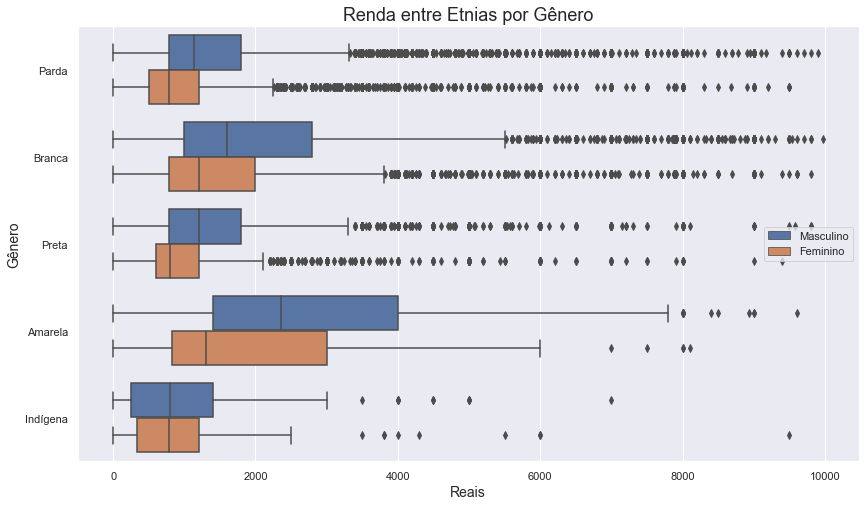

In [425]:

ax = sns.boxplot(
                x = dados.query("Renda<10000").Renda,
                y = dados.Cor,
                hue = dados.Sexo,
                data = dados,
                )

ax.figure.set_size_inches(14,8)
ax.set_ylabel('Gênero',size = 14)
ax.set_xlabel('Reais',size = 14)
plt.legend()
ax.set_title('Renda entre Etnias por Gênero',size = 18)
ax.figure.show()

> ### Conclusões

A desigualdade da renda por genero é evidente, mas entre as etnias entre o mesmo genero existem desigualdades.
as etnias que possuem maior renda estão as : Amarela e Branca.

A etnia que tem menor renda entre os generos, é a indígena

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [426]:
from scipy import stats

In [427]:
stats.percentileofscore(dados.Renda,788, kind = "weak") 


28.86777719937533

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [428]:
dados.Renda.quantile(0.99)


15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>


In [429]:
genero_estudo = pd.crosstab(index=dados.Estudo, 
                            columns = dados.Sexo,
                            values = dados.Renda,
                            aggfunc={'mean', 'median', 'max', 'std'}).round(2)
genero_estudo

max               mean             median            \
Sexo          Feminino Masculino Feminino Masculino Feminino Masculino   
Estudo                                                                   
1 a 3 anos        4000     80000   529.81   1003.58    460.0     788.0   
10 a 12 anos    120000    200000  1291.53   2107.19   1000.0    1500.0   
13 a 15 anos    100000    200000  3560.32   5590.94   2400.0    3800.0   
4 a 6 anos       10000     50000   754.43   1340.14    788.0    1000.0   
7 a 9 anos       20000     60000   902.02   1582.64    788.0    1200.0   
Sem instrução    10000     30000   532.82    810.87    400.0     700.0   

                   std            
Sexo          Feminino Masculino  
Estudo                            
1 a 3 anos      449.82   1774.17  
10 a 12 anos   2178.12   2605.01  
13 a 15 anos   3964.11   6914.52  
4 a 6 anos      624.05   1452.02  
7 a 9 anos      857.68   1602.65  
Sem instrução   633.53   1025.50

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>

#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

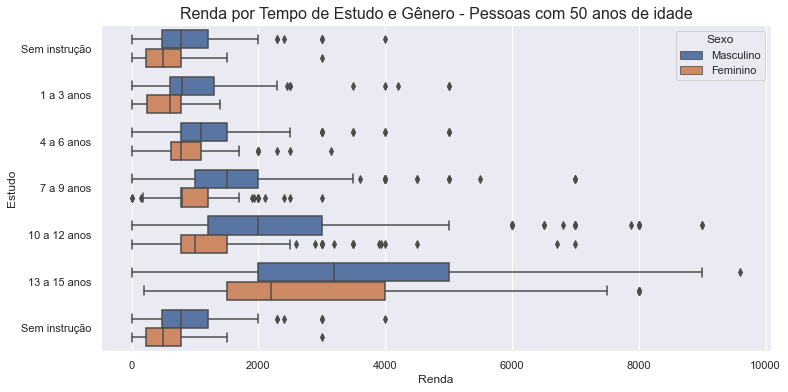

In [430]:
ax = sns.boxplot(x = dados.query('Renda < 10000 and Idade == 50').Renda,
                 y = dados.Estudo,
                 hue = dados.Sexo,
                 data = dados,
                 order = labels)


ax.set_title('Renda por Tempo de Estudo e Gênero - Pessoas com 50 anos de idade', size = 16)
ax.figure.set_size_inches(12,6)
ax.figure.show()


> ### Conclusões

Os homens em todas as categorias de estudo, recebem mais que as mulheres.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>


In [431]:
renda_uf = dados.groupby('UF').agg({'Renda':['mean','median','max','count','std']}).round(2)
renda_uf.columns = ['_'.join(col) for col in renda_uf.columns.values] # multIndex para Single Index
renda_uf.sort_values('Renda_mean')

,Renda_mean,Renda_median,Renda_max,Renda_count,Renda_std
UF,,,,,
Maranhão,1019.43,700.0,30000,1787,1887.82
Piauí,1074.55,750.0,40000,1211,2373.36
Sergipe,1109.11,788.0,16000,1287,1479.00
Alagoas,1144.55,788.0,11000,903,1237.86
Ceará,1255.40,789.0,25000,3359,1821.96
Paraíba,1293.37,788.0,30000,1274,1950.27
Rio Grande do Norte,1344.72,800.0,15500,973,1651.81
Pará,1399.08,850.0,50000,4449,2053.78
Bahia,1429.65,800.0,200000,5717,3507.92


### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

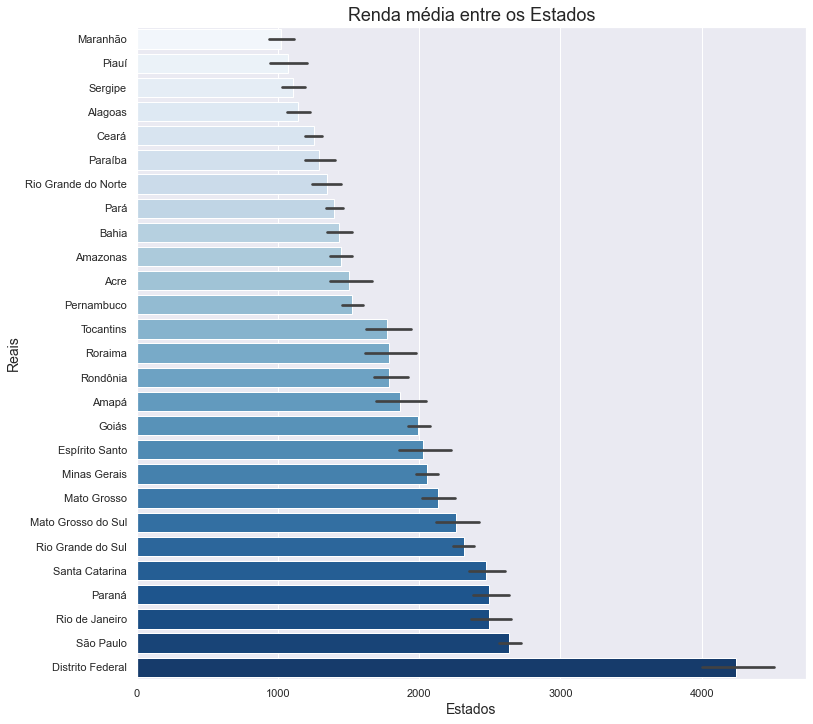

In [432]:

lista_uf = list(dados.groupby(["UF"]).mean()["Renda"].sort_values().index)


color = sns.color_palette("Blues",n_colors =len(lista_uf))

ax = sns.barplot( y = dados.UF,
                  x = dados.Renda,
                  palette = color,
                  data = dados,
                  order = lista_uf           
                 )
ax.figure.set_size_inches(12,12)
ax.set_title('Renda média entre os Estados', size=18)
ax.set_xlabel('Estados',size=14)
ax.set_ylabel('Reais',size=14)
ax.figure.show()


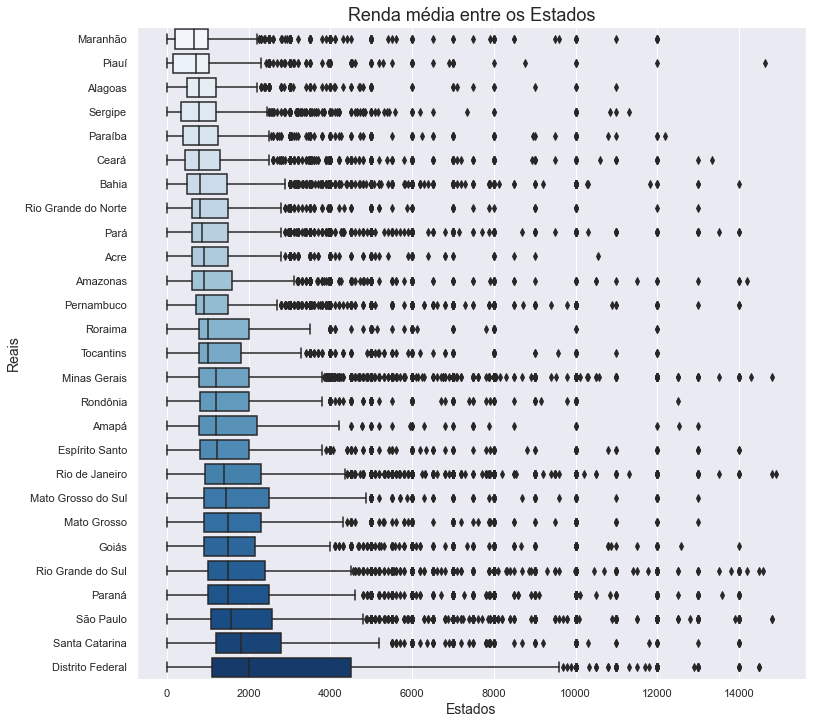

In [433]:

lista_uf = list(dados.groupby(["UF"]).median()["Renda"].sort_values().index)


color = sns.color_palette("Blues",n_colors =len(lista_uf))

ax = sns.boxplot( y = dados.UF,
                  x = dados.query("Renda < 15000").Renda,
                  palette = color,
                  data = dados,
                  order = lista_uf           
                 )
ax.figure.set_size_inches(12,12)
ax.set_title('Renda média entre os Estados', size=18)
ax.set_xlabel('Estados',size=14)
ax.set_ylabel('Reais',size=14)
ax.figure.show()

> ### Conclusões

O Brasil é dividido em regiões: Norte, Nordeste, Centro-Oeste, Sudeste e Sul. Entre as regiões existem diferenças sociais e econômicas. Alguns destes estados receberam mais investimento ou apoio do governo federal no passado, já outros não tiveram tanto apoio.

No gráfico, temos que os estados que possuem a média de renda menor, estão concentrados no Nordeste do país.

Em seguida,  os estados pertencentes à região Norte estão em segundo lugar com a menor renda média.

As regiões que possuem maiores valores de renda são:  Sul, Centro-Oeste e Sudeste. Brasília é o estado que possui maior renda do país.
